# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how = "left")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
uniquemouseid = merge_df["Mouse ID"].unique()
micecount = len(uniquemouseid)
print(f'There are {micecount} unique mice.')

There are 249 unique mice.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
searchduplicates = merge_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name = "Mousecount")
duplicatemice = searchduplicates[searchduplicates["Mousecount"] > 1]["Mouse ID"].unique()
duplicatemice
                


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicatemouseinfo_df = merge_df.loc[merge_df["Mouse ID"] == duplicatemice[0]]
duplicatemouseinfo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedmerge_df = merge_df[merge_df["Mouse ID"] != "g989"]
cleanedmerge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
uniquemouseid = cleanedmerge_df["Mouse ID"].unique()
micecount = len(uniquemouseid)
print(f'There are {micecount} unique mice.')

There are 248 unique mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drugregimen_df = cleanedmerge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugregimen_df = drugregimen_df.groupby(["Drug Regimen"])
meantv = drugregimen_df.mean()
meantv = meantv.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

mediantv = drugregimen_df.median()
mediantv = mediantv.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})

variancetv = drugregimen_df.var()
variancetv = variancetv.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Varience"})

STDEVtv = drugregimen_df.std()
STDEVtv = STDEVtv.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})

SEMtv = drugregimen_df.sem()
SEMtv = SEMtv.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})

#print(meantv)
#print(mediantv)
#print(variancetv)
#print(STDEVtv)
#print(SEMtv)

completedf = pd.concat([meantv, mediantv, variancetv, STDEVtv, SEMtv], axis=1)
completedf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggdrugregimen_df = cleanedmerge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Using the aggregation method, produce the same summary statistics in a single line
aggcompletedf = aggdrugregimen_df.groupby("Drug Regimen").aggregate(    
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)","std"),
    sem=("Tumor Volume (mm3)","sem"))

aggcompletedf

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mousepoints'>

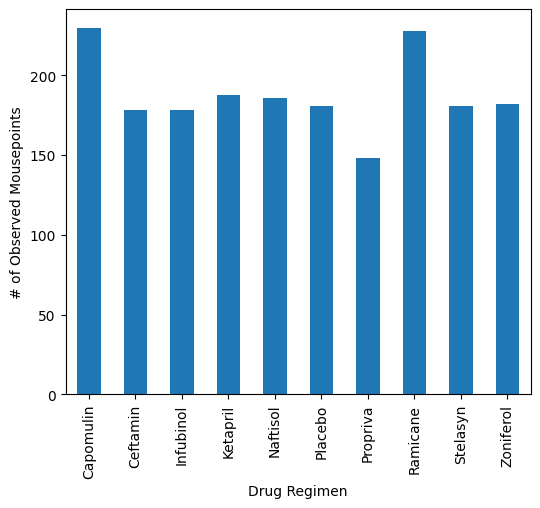

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totalrows = cleanedmerge_df[["Drug Regimen", "Mouse ID", "Timepoint"]]
x_axis = totalrows.groupby(["Drug Regimen"]).size()
x_axis.plot(kind="bar", figsize=(6,5), xlabel="Drug Regimen", ylabel="# of Observed Mousepoints")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

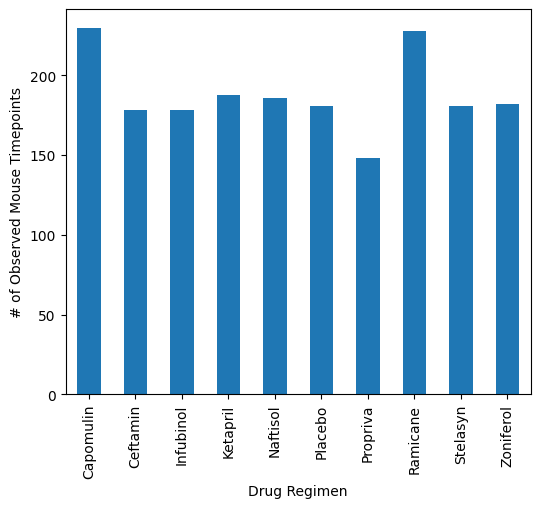

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6,5))
x_axis.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")


Text(0, 0.5, 'count')

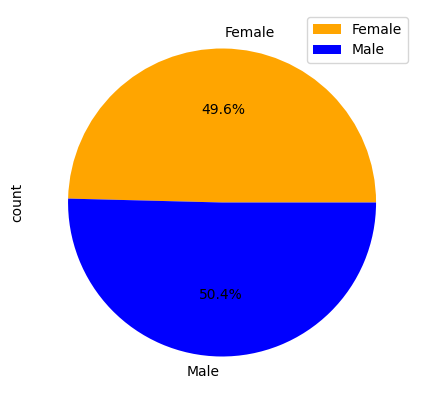

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
micebygender = cleanedmerge_df[["Mouse ID", "Sex"]]

micebygender = micebygender.drop_duplicates(subset="Mouse ID")
micebygender = micebygender.groupby(["Sex"]).count()



# Make the pie chart
micebygender.plot.pie(y="Mouse ID", figsize= (5,5), colors=["orange","blue"],autopct="%1.1f%%")
plt.ylabel("count")

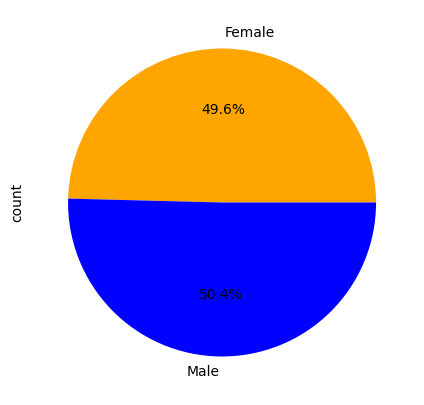

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
micebygender = cleanedmerge_df[["Mouse ID", "Sex"]]
#Learned the .drop_duplicates method from Xpert Learning Assistance 
micebygender = micebygender.drop_duplicates(subset="Mouse ID")
micebygender = micebygender.groupby(["Sex"]).count()
micebygender

# Make the pie chart
label = micebygender.index
x = micebygender["Mouse ID"]
colors = ["orange", "blue"]

plt.figure(figsize=(5,5))
plt.pie(x, labels= label, colors=colors, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#singlemice_df = cleanedmerge_df.drop_duplicates(subset="Mouse ID")
#newcleanedmerge_df = pd.DataFrame(cleanedmerge_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]])
newcleanedmerge_df = pd.DataFrame(cleanedmerge_df[["Drug Regimen", "Mouse ID", "Timepoint"]])

newcleanedmerge_df = newcleanedmerge_df.groupby(["Drug Regimen", "Mouse ID"]).max().reset_index()

#mergeclean_df = mergeclean_df.drop_duplicates(subset="Mouse ID")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergeclean_df = pd.merge(newcleanedmerge_df, study_results)

#Xpert learning assistant helped with the .isin function to filter by the 4 requested drugs.
filterdrugs = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
mergeclean_df = mergeclean_df[mergeclean_df["Drug Regimen"].isin(filterdrugs)]

#mergeclean_df = mergeclean_df[mergeclean_df["Drug Regimen"].isin(filterdrugs)].reset_index()
mergeclean_df.reset_index(drop=True, inplace = True)
mergeclean_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,38.982878,2
1,Capomulin,b742,45,38.939633,0
2,Capomulin,f966,20,30.485985,0
3,Capomulin,g288,45,37.074024,1
4,Capomulin,g316,45,40.159220,2
...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0
96,Ramicane,u196,45,40.667713,3
97,Ramicane,w678,5,43.166373,0
98,Ramicane,y449,15,44.183451,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentdrugs = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatmentdrugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
        tumorvol = mergeclean_df.loc[mergeclean_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
        tumorvoldata.append((drug, tumorvol))


#tumorvoldata = pd.DataFrame(tumorvoldata, columns = ["Drug Regimen", "Greatest Tumor Volumes (mm3) per Mouse"])
#tumorvolseries = tumorvoldata["Greatest Tumor Volumes (mm3) per Mouse"]

    # add subset
quartiles = mergeclean_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles

    # Determine outliers using upper and lower bounds
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 37.19
The upper quartile is: 59.93
The interquartile range is: 22.74
The the median is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.


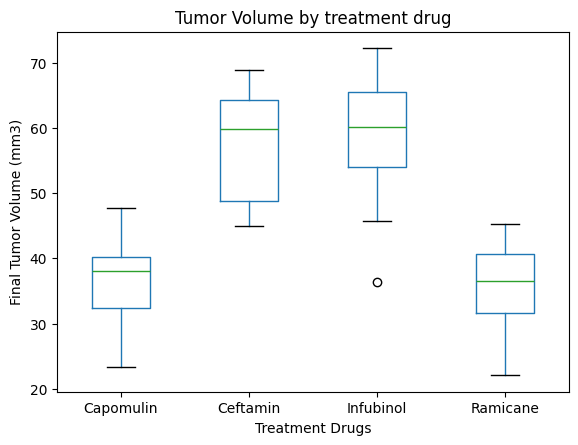

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#Xpert Learning Assistance provided guidance on DataFrame.boxplot format
mergeclean_df.boxplot(column = "Tumor Volume (mm3)", by = "Drug Regimen", grid=False)

plt.title('Tumor Volume by treatment drug')
plt.suptitle("")
plt.xlabel("Treatment Drugs")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

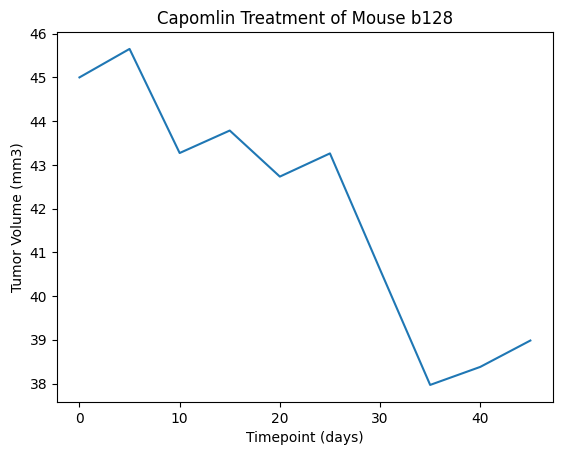

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse_df = cleanedmerge_df.loc[cleanedmerge_df["Mouse ID"] == "b128"]
singlemouse_df = singlemouse_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]


xaxis = singlemouse_df["Timepoint"]
yaxis = singlemouse_df["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomlin Treatment of Mouse b128")

plt.plot(xaxis, yaxis)


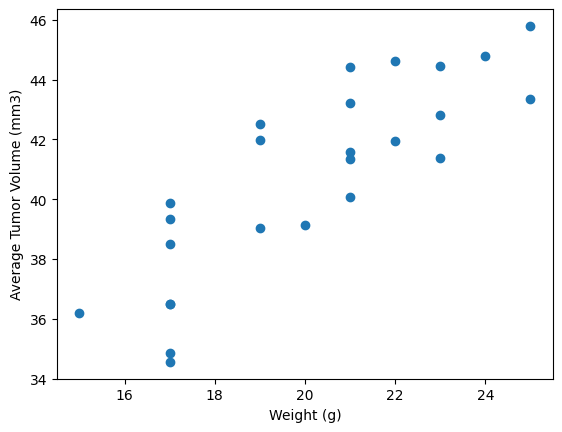

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
allcapomulin_df = cleanedmerge_df[cleanedmerge_df["Drug Regimen"] == "Capomulin"]
allcapomulin_df = allcapomulin_df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

allcapomulin_dftumormean = allcapomulin_df.groupby("Mouse ID").mean()   

plt.scatter(allcapomulin_dftumormean['Weight (g)'], allcapomulin_dftumormean['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


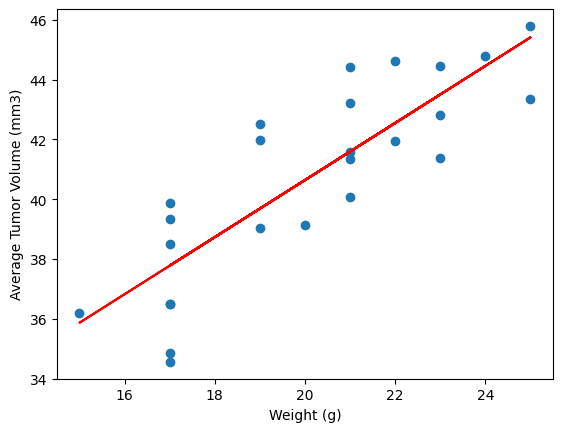

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = allcapomulin_dftumormean["Weight (g)"]
meantumvol = allcapomulin_dftumormean["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,meantumvol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = allcapomulin_dftumormean['Weight (g)']
y_values = allcapomulin_dftumormean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


In [25]:
allinfubinol_df = mergeclean_df[mergeclean_df["Drug Regimen"] == "Infubinol"]
#allinfubinol_df = allinfubinol_df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
#allinfubinol_df = allinfubinol_df.groupby("Mouse ID").mean()
c326_df = cleanedmerge_df.loc[cleanedmerge_df["Mouse ID"] == "c326"]
c326_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,0,45.000000,0,Infubinol,Female,18,25
420,c326,5,36.321346,0,Infubinol,Female,18,25
